In [53]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.font_manager as fm


In [54]:
df = pd.read_csv("C:/Users/keats/OneDrive/바탕 화면/onlinesales_final.csv")
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,쿠폰코드,할인율,할인금액,매출,수익,총 매출(배송비포함)
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,OFF10,10.0,0.205,2.05,1.845,8.55
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,SALE10,10.0,0.000,87.65,87.650,435.10
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,AIO10,10.0,1.650,16.50,14.850,435.10


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객ID         52924 non-null  object 
 1   거래ID         52924 non-null  object 
 2   거래날짜         52924 non-null  object 
 3   제품ID         52924 non-null  object 
 4   제품카테고리       52924 non-null  object 
 5   수량           52924 non-null  int64  
 6   평균금액         52924 non-null  float64
 7   배송료          52924 non-null  float64
 8   쿠폰상태         52924 non-null  object 
 9   성별           52924 non-null  object 
 10  고객지역         52924 non-null  object 
 11  가입기간         52924 non-null  int64  
 12  쿠폰코드         52924 non-null  object 
 13  할인율          52924 non-null  float64
 14  할인금액         52924 non-null  float64
 15  매출           52924 non-null  float64
 16  수익           52924 non-null  float64
 17  총 매출(배송비포함)  52924 non-null  float64
dtypes: float64(7), int64(2), object(9)
memory usag

In [62]:
total_sales = df.groupby(["고객ID", "거래ID"]).agg(
    매출합=("매출", "sum"),
    배송료=("배송료", "first")  # 거래당 배송료를 1회만 추가
).reset_index()

# 총 매출 (매출 총합 + 배송료 1회 추가)
total_sales["총매출(배송료포함)"] = total_sales["매출합"] + total_sales["배송료"]

# 전체 총 매출 계산
final_total_sales = total_sales["총매출(배송료포함)"].sum()

# 평균 객단가(Avg revenue per users)
arpu = final_total_sales / df["고객ID"].nunique()
arpu

np.float64(3344.5382970027244)

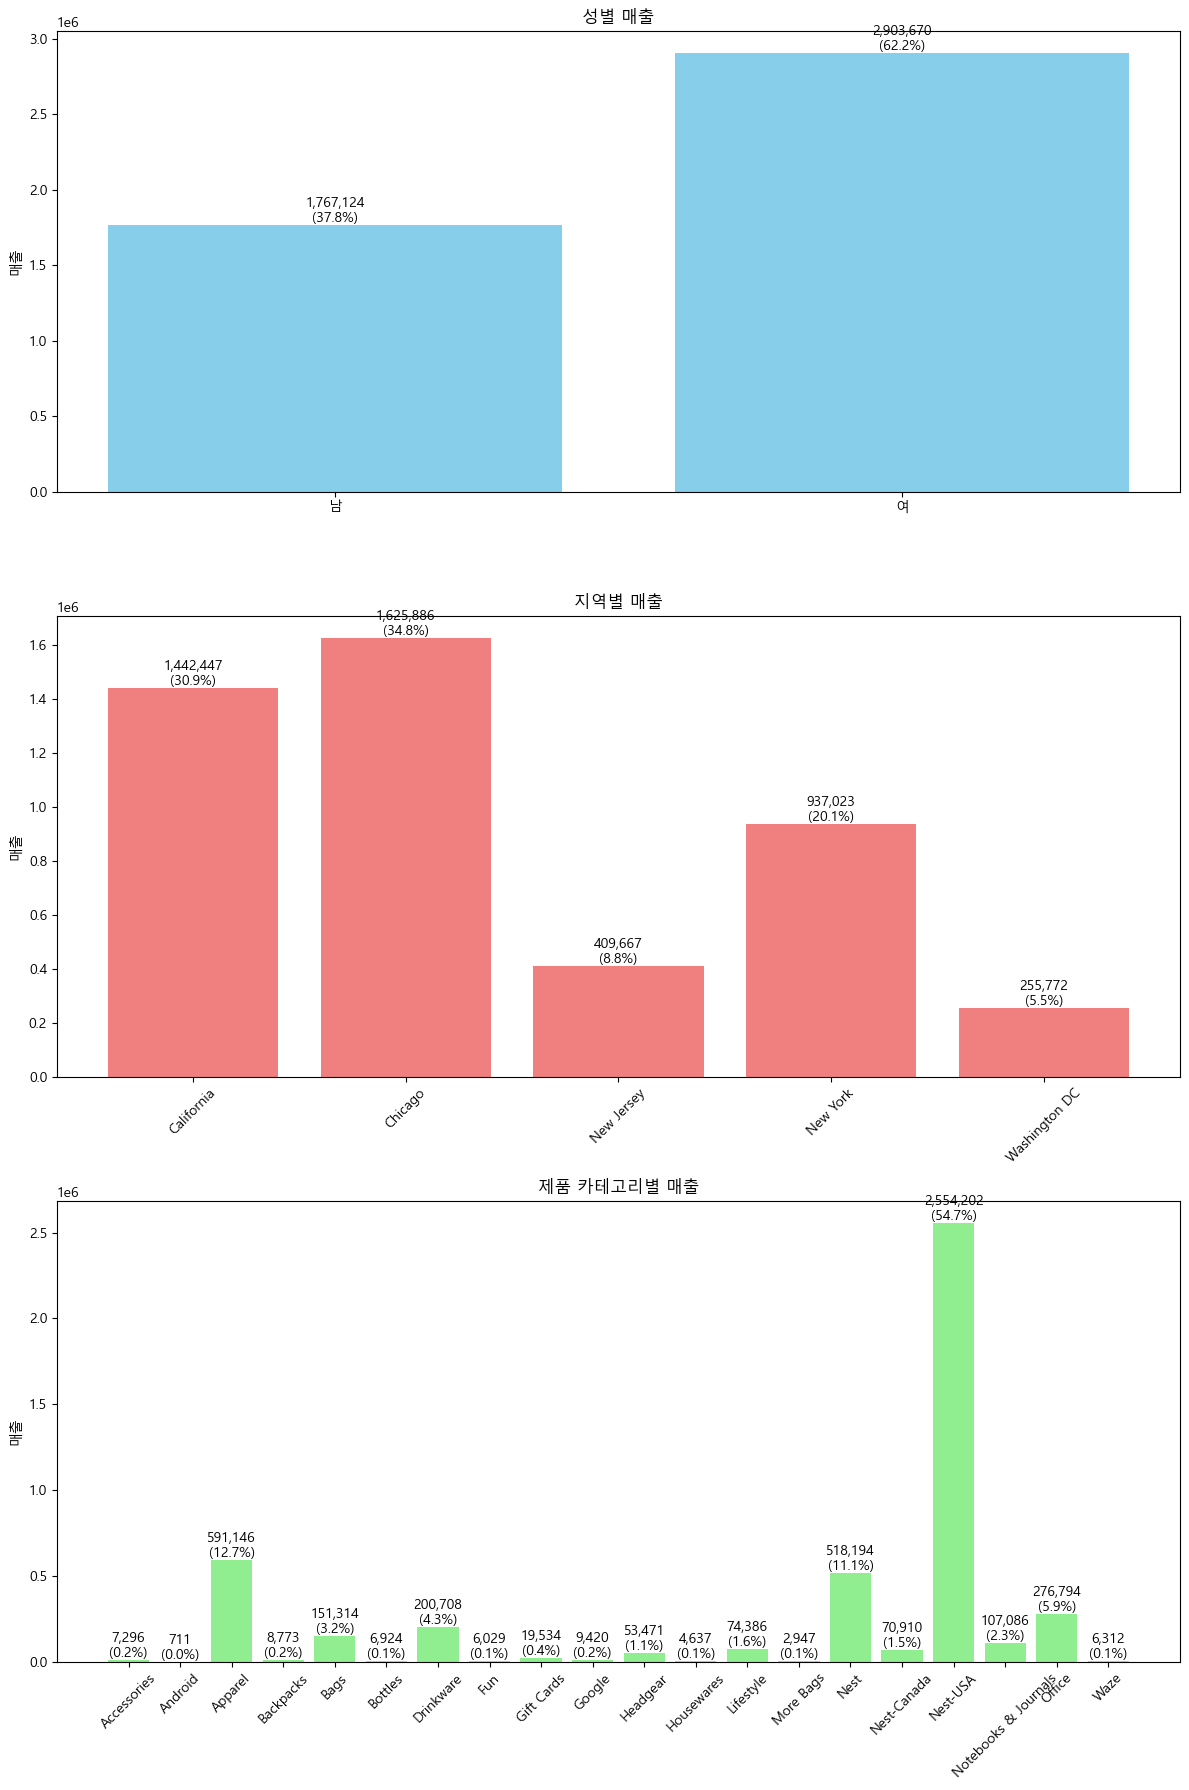

In [72]:
plt.rc('font', family='Malgun Gothic')

# 전체 총매출 계산
total_revenue = df["매출"].sum()

# 성별 매출 데이터 추출 및 비율 계산
gender_sales = df.groupby("성별")["매출"].sum()
gender_sales_percent = (gender_sales / total_revenue) * 100

# 지역별 매출 데이터 추출 및 비율 계산
region_sales = df.groupby("고객지역")["매출"].sum()
region_sales_percent = (region_sales / total_revenue) * 100

# 제품 카테고리별 매출 데이터 추출 및 비율 계산
category_sales = df.groupby("제품카테고리")["매출"].sum()
category_sales_percent = (category_sales / total_revenue) * 100

# 그래프 생성
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 성별 매출 그래프
axes[0].bar(gender_sales.index, gender_sales.values, color="skyblue")
axes[0].set_title("성별 매출")
axes[0].set_ylabel("매출")
for i, (v, p) in enumerate(zip(gender_sales.values, gender_sales_percent.values)):
    axes[0].text(i, v, f"{v:,.0f}\n({p:.1f}%)", ha='center', va='bottom', fontsize=10)

# 지역별 매출 그래프
axes[1].bar(region_sales.index, region_sales.values, color="lightcoral")
axes[1].set_title("지역별 매출")
axes[1].set_ylabel("매출")
axes[1].tick_params(axis='x', rotation=45)
for i, (v, p) in enumerate(zip(region_sales.values, region_sales_percent.values)):
    axes[1].text(i, v, f"{v:,.0f}\n({p:.1f}%)", ha='center', va='bottom', fontsize=10)

# 제품 카테고리별 매출 그래프
axes[2].bar(category_sales.index, category_sales.values, color="lightgreen")
axes[2].set_title("제품 카테고리별 매출")
axes[2].set_ylabel("매출")
axes[2].tick_params(axis='x', rotation=45)
for i, (v, p) in enumerate(zip(category_sales.values, category_sales_percent.values)):
    axes[2].text(i, v, f"{v:,.0f}\n({p:.1f}%)", ha='center', va='bottom', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.show()


인당 평균 구매 건수

In [41]:
df['거래날짜'] = pd.to_datetime(df['거래날짜'])  # 날짜 변환

In [22]:
# 고객별 구매 건수 계산
customer_order_counts = df.groupby('고객ID')['거래ID'].nunique()

# 전체 고객의 평균 구매 건수
average_orders_per_customer = customer_order_counts.mean()

average_orders_per_customer

np.float64(18.141008174386922)

In [13]:
# 고객당 평균 매출 (ARPU) 계산
arpu = df["총 매출(배송비포함)"].sum() / df["고객ID"].nunique()

# 결과 출력
arpu


np.float64(8610.37159400545)

In [14]:
# 고객당 평균 매출 (ARPU) 계산
arpu = df["매출"].sum() / df["고객ID"].nunique()

# 결과 출력
arpu

np.float64(3181.740204359673)

In [15]:
# 고객당 평균 매출 (ARPU) 계산
arpu = df["수익"].sum() / df["고객ID"].nunique()

# 결과 출력
arpu

np.float64(2970.042344686649)

평균 객단가

In [43]:
# 고객별 총 지출액 계산 (평균금액 * 수량)
df['총지출'] = df['평균금액'] * df['수량']

# 고객별 총 구매 금액 및 총 거래 건수 계산
customer_total_spent = df.groupby('고객ID')['총지출'].sum()
customer_order_counts = df.groupby('고객ID')['거래ID'].nunique()

# 고객별 평균 객단가 (총 구매 금액 / 거래 건수)
customer_avg_order_value = customer_total_spent / customer_order_counts

# 전체 고객의 평균 객단가
average_order_value = customer_avg_order_value.mean()

average_order_value

np.float64(164.52047596392902)

In [ ]:
# 총 매출 계산
total_revenue = df['평균금액'].sum()

# 총 거래 건수 (중복 제거)
total_orders = df['거래ID'].nunique()

# 평균 객단가 (AOV)
average_order_value = total_revenue / total_orders

print(f"평균 객단가 (AOV): {average_order_value:.2f}")

평균 객단가 (AOV): 110.32


In [85]:

aov = df['평균금액'].sum() / df['거래ID'].nunique()

# 중앙값(Median) 계산
median_order_value = df.groupby('거래ID')['평균금액'].sum().median()

print(f"평균 객단가(AOV): {aov:.2f}")
print(f"중앙값 객단가(Median): {median_order_value:.2f}")


평균 객단가(AOV): 110.32
중앙값 객단가(Median): 100.91


총 매출

In [ ]:
# 총 매출 계산 (평균금액 * 수량)
df['총지출'] = df['평균금액'] * df['수량']

# 전체 매출
total_revenue = df['총지출'].sum()

# 평균 매출 (고객당 평균 지출액)
average_revenue_per_customer = customer_total_spent.mean()

print(f"총 매출: {total_revenue:,.2f}")
print(f"평균 매출 (고객당 평균 지출액): {average_revenue_per_customer:,.2f}")

총 매출: 4,670,794.62
평균 매출 (고객당 평균 지출액): 3,181.74


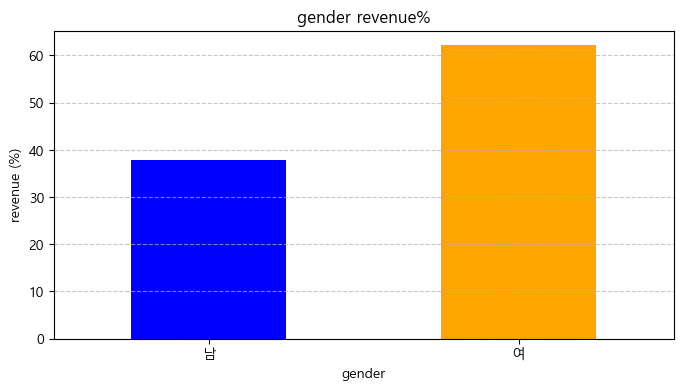

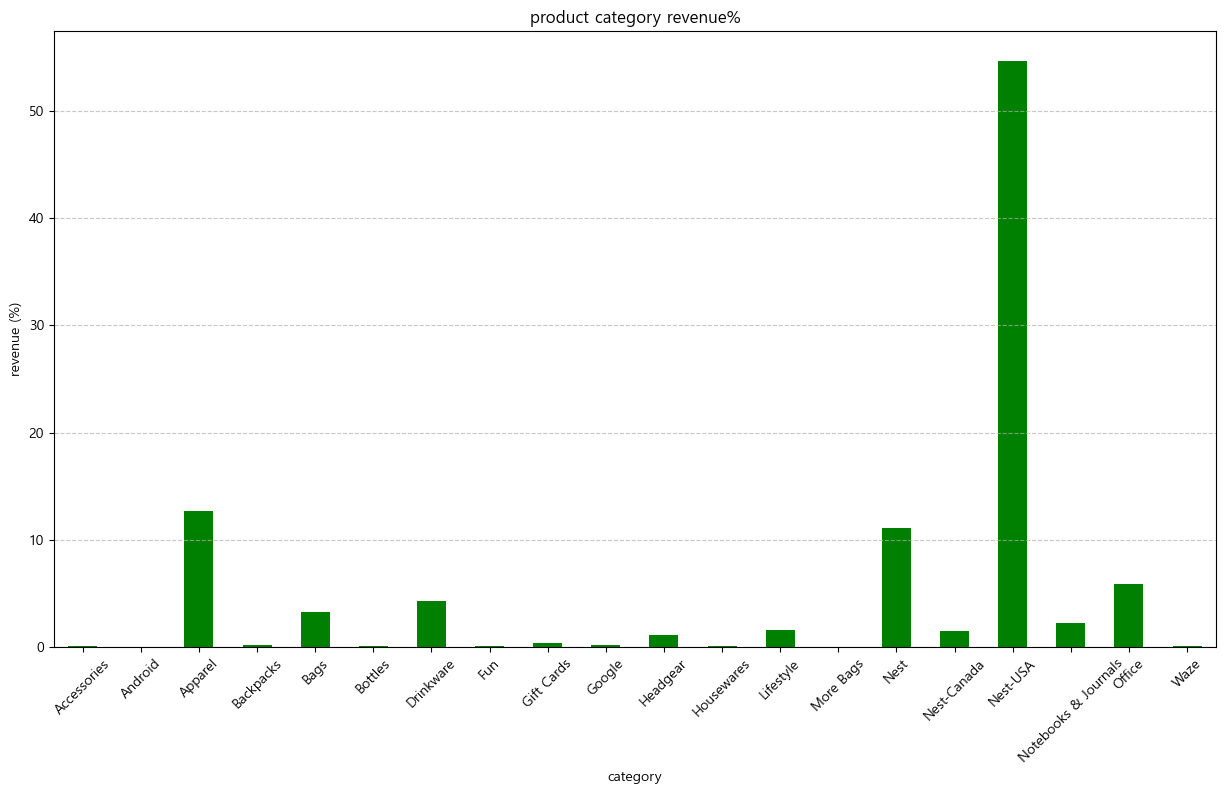

In [76]:
plt.rc('font', family='Malgun Gothic')
# 성별 매출 비중
gender_revenue_share = df.groupby('성별')['총지출'].sum() / total_revenue * 100

# 제품 카테고리별 매출 비중
category_revenue_share = df.groupby('제품카테고리')['총지출'].sum() / total_revenue * 100

plt.figure(figsize=(8, 4))
gender_revenue_share.plot(kind='bar', color=['blue', 'orange'])
plt.title("gender revenue%")
plt.ylabel("revenue (%)")
plt.xlabel("gender")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 제품 카테고리별 매출 비중 막대 그래프
plt.figure(figsize=(15, 8))
category_revenue_share.plot(kind='bar', color='green')
plt.title("product category revenue%")
plt.ylabel("revenue (%)")
plt.xlabel("category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

고객 생애 가치(CLV)

In [45]:
# 전체 고객 수
total_customers = df['고객ID'].nunique()

# 일정 기간 동안 거래가 없는 고객 수 (예: 6개월 이상 거래 없는 고객)
last_date = df['거래날짜'].max()
inactive_customers = df[df['거래날짜'] < (last_date - pd.DateOffset(months=6))]['고객ID'].nunique()

# 이탈률 (CR) 계산
churn_rate = inactive_customers / total_customers

# 고객 유지 기간 (T = 1 / CR)
customer_lifespan = 1 / churn_rate if churn_rate > 0 else None

print(f"이탈률(Churn Rate): {churn_rate:.2%}")
print(f"예상 고객 유지 기간: {customer_lifespan:.2f}년")

이탈률(Churn Rate): 61.17%
예상 고객 유지 기간: 1.63년


In [46]:
# 평균 객단가 (AOV)
average_order_value = customer_total_spent.sum() / customer_order_counts.sum()

# 구매 빈도 (F)
purchase_frequency = customer_order_counts.sum() / df['고객ID'].nunique()

# 고객 유지 기간 (T) - 실제 데이터가 있다면 기간 데이터를 기반으로 계산 가능
# 예제에서는 평균 2년(가정)
customer_lifespan = 2  # 연 단위

# 고객생애가치 (CLV)
clv = average_order_value * purchase_frequency * customer_lifespan

print(f"평균 객단가 (AOV): {average_order_value:,.2f}")
print(f"구매 빈도 (F): {purchase_frequency:.2f}")
print(f"고객 유지 기간 (T): {customer_lifespan}년")
print(f"고객생애가치 (CLV): {clv:,.2f}")

평균 객단가 (AOV): 175.39
구매 빈도 (F): 18.14
고객 유지 기간 (T): 2년
고객생애가치 (CLV): 6,363.48


            고객지역         총지출
1        Chicago  1625885.58
0     California  1442447.31
3       New York   937022.63
2     New Jersey   409666.86
4  Washington DC   255772.24


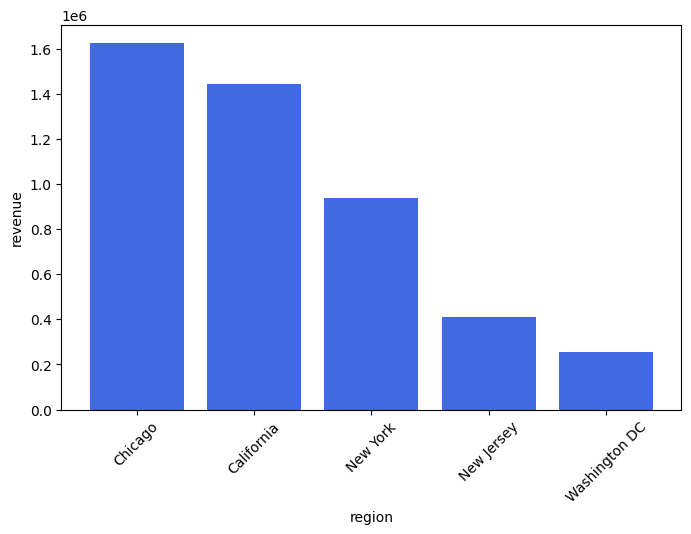

In [ ]:
# 지역별 총 매출 계산
region_sales = df.groupby('고객지역')['총지출'].sum().reset_index()

# 지역별 매출 내림차순 정렬
region_sales = region_sales.sort_values(by='총지출', ascending=False)

# 결과 출력
print(region_sales)

# 지역별 매출 시각화 (막대 그래프)
plt.figure(figsize=(8, 5))
plt.bar(region_sales['고객지역'], region_sales['총지출'], color='royalblue')
plt.xlabel('region')
plt.ylabel('revenue')
plt.xticks(rotation=45)  # X축 라벨 가독성을 위해 회전
plt.show()

In [48]:
# 지역별 평균 객단가 계산(xxxxxx)
region_aov = df.groupby('고객지역')['총지출'].sum() / df.groupby('고객지역')['거래ID'].nunique()
print(region_aov)

고객지역
California       182.819684
Chicago          178.865300
New Jersey       180.549520
New York         170.398732
Washington DC    181.398752
dtype: float64


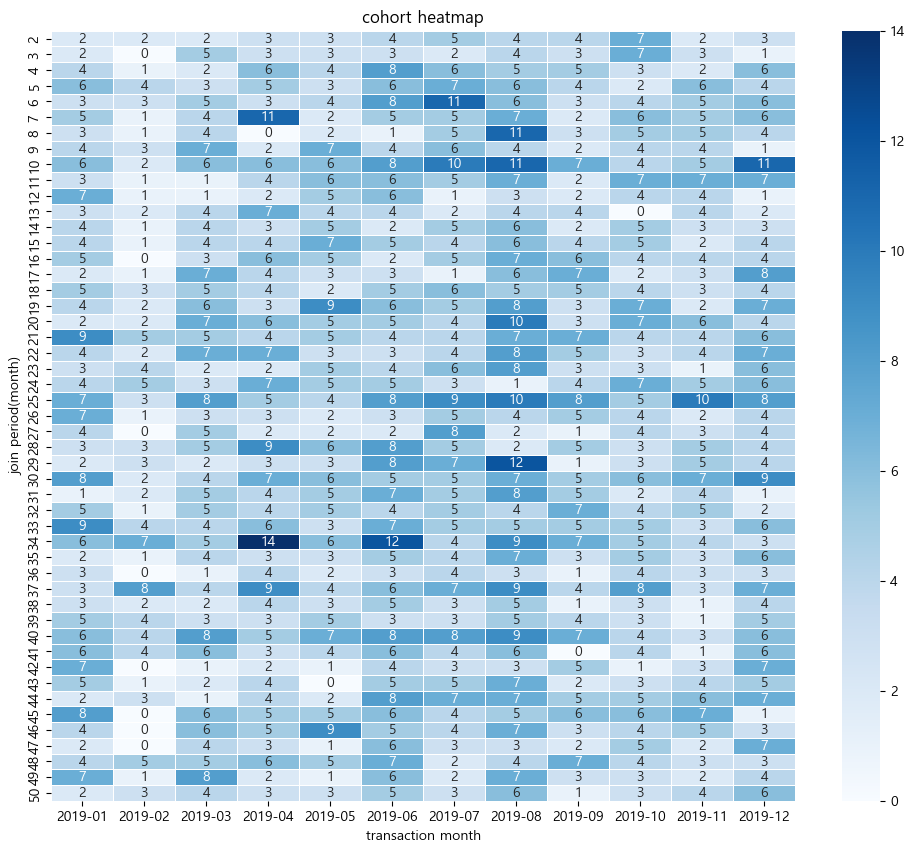

In [93]:
# 가입 기간(개월)별 첫 구매 기준으로 코호트 그룹 생성

# 가입 기간별 첫 구매 월 계산
df['거래월'] = df['거래날짜'].dt.to_period('M')

# 코호트 매출 테이블 생성
cohort_data = df.groupby(['가입기간', '거래월'])['고객ID'].nunique().unstack().fillna(0)

# 코호트 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(cohort_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("cohort heatmap")
plt.xlabel("transaction month")
plt.ylabel("join period(month)")
plt.show()

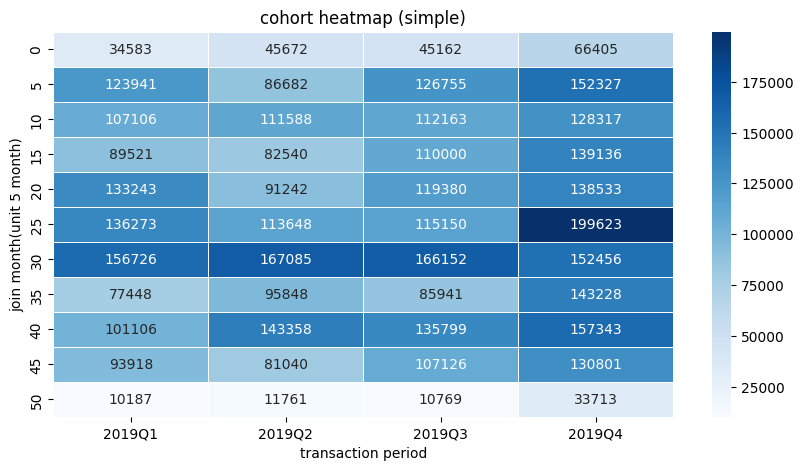

In [55]:




# 가입기간을 숫자로 변환 후 범위로 그룹화 (예: 5개월 단위)
df['가입기간그룹'] = (df['가입기간'] // 5) * 5  # 5개월 단위 그룹화

# 거래 날짜를 분기 단위(3개월 단위)로 변환
df['거래월'] = df['거래날짜'].dt.to_period('Q')  # Q1, Q2, Q3, Q4 형식

# 코호트 테이블 생성 (간소화된 데이터)
cohort_data = df.groupby(['가입기간그룹', '거래월'])['총지출'].sum().unstack().fillna(0)

# 히트맵 시각화 (가독성 개선)
plt.figure(figsize=(10, 5))  # 크기 조정
sns.heatmap(cohort_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

plt.title("cohort heatmap (simple)")
plt.xlabel("transaction period")
plt.ylabel("join month(unit 5 month)")
plt.show()


리텐션율/이탈률

In [65]:
# 고객별 첫 구매월 계산
df['가입월'] = df.groupby('고객ID')['거래날짜'].transform('min').dt.to_period('M')

# 코호트별 잔존 고객 수 계산
cohort_counts = df.groupby(['가입월', '거래월'])['고객ID'].nunique().unstack().fillna(0)

# 첫 달 고객 수를 기준으로 각 달의 잔존율 계산
retention_rate = cohort_counts.div(cohort_counts.iloc[:, 0], axis=0) * 100
retention_rate
churn_rate = 100 - retention_rate
churn_rate

거래월,2019Q1,2019Q2,2019Q3,2019Q4
가입월,,,,
2019-01,0.0,64.651163,67.906977,72.558140
2019-02,0.0,62.500000,55.208333,65.625000
2019-03,0.0,64.406780,61.581921,76.271186
2019-04,NaN,-inf,-inf,-inf
2019-05,NaN,-inf,-inf,-inf
2019-06,NaN,-inf,-inf,-inf
2019-07,NaN,NaN,-inf,-inf
2019-08,NaN,NaN,-inf,-inf
2019-09,NaN,NaN,-inf,-inf


재구매율

In [67]:
# 고객별 총 구매 횟수 계산
customer_orders = df.groupby('고객ID')['거래ID'].nunique()

# 2회 이상 구매한 고객 수 계산
repeat_customers = customer_orders[customer_orders > 1].count()

# 전체 고객 수
total_customers = df['고객ID'].nunique()

# 재구매율 계산
repeat_purchase_rate = (repeat_customers / total_customers) * 100
repeat_purchase_rate

np.float64(91.4850136239782)

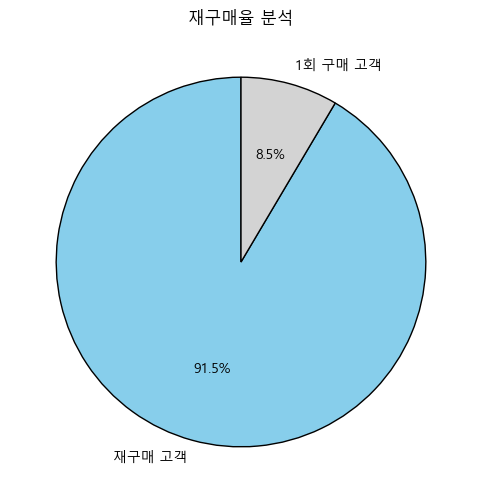

In [86]:
plt.figure(figsize=(6, 6))
plt.pie(
    [repeat_purchase_rate, 100 - repeat_purchase_rate],
    labels=['재구매 고객', '1회 구매 고객'],
    autopct='%1.1f%%',
    colors=['skyblue', 'lightgray'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("재구매율 분석")
plt.show()

In [87]:
# 고객별 총 구매 금액 계산
customer_total_spent = df.groupby('고객ID')['총지출'].sum()

# 상위 10% 고객 기준 설정
vip_threshold = customer_total_spent.quantile(0.90)

# VIP 고객 리스트 추출 (재구매 고객 중에서)
vip_repeat_customers = customer_total_spent[(customer_total_spent >= vip_threshold) & (customer_orders > 1)]

# 상위 10% 재구매 고객이 전체 매출에서 차지하는 비율
vip_contribution = vip_repeat_customers.sum() / customer_total_spent.sum() * 100

print(f"재구매 고객 중 VIP 고객의 매출 기여도: {vip_contribution:.2f}%")

재구매 고객 중 VIP 고객의 매출 기여도: 42.40%


In [88]:
# 고객별 구매 날짜 간격 계산
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
customer_purchase_cycle = df.groupby('고객ID')['거래날짜'].apply(lambda x: x.diff().mean().days)

# 재구매 고객의 평균 구매 주기
average_purchase_cycle = customer_purchase_cycle[customer_orders > 1].mean()

print(f"재구매 고객의 평균 구매 주기: {average_purchase_cycle:.1f}일")

재구매 고객의 평균 구매 주기: 3.0일


In [89]:
# 재구매 고객이 가장 많이 구매한 제품 카테고리
repeat_customer_categories = df[df['고객ID'].isin(customer_orders[customer_orders > 1].index)]
top_repeat_categories = repeat_customer_categories.groupby('제품카테고리')['거래ID'].count().sort_values(ascending=False)

print(top_repeat_categories.head(10))

제품카테고리
Apparel                 18007
Nest-USA                13994
Office                   6472
Drinkware                3459
Lifestyle                3044
Nest                     2195
Bags                     1861
Headgear                  764
Notebooks & Journals      746
Waze                      552
Name: 거래ID, dtype: int64


In [60]:
# VIP 고객 기준 설정 (상위 10% 고객 선정)
vip_threshold = customer_total_spent.quantile(0.90)  # 상위 10% 기준

# VIP 고객 리스트 추출
vip_customers = customer_total_spent[customer_total_spent >= vip_threshold].sort_values(ascending=False)

# 결과 데이터프레임 생성
vip_df = vip_customers.reset_index().rename(columns={'총지출': '총구매액'})

# 결과 출력
vip_df

,고객ID,총구매액
0,USER_0736,75937.55
1,USER_0118,74601.36
2,USER_0563,57137.79
3,USER_0643,48980.38
4,USER_1355,46205.77
...,...,...
142,USER_1186,7493.31
143,USER_0220,7423.92
144,USER_0281,7423.24
145,USER_0411,7393.91


In [61]:
# 성별별 평균 구매 금액 계산
gender_avg_spent = df.groupby('성별')['총지출'].mean().reset_index()
gender_avg_spent

,성별,총지출
0,남,88.724426
1,여,87.971346


In [90]:

# 최근 3개월(90일) 동안 거래한 활성 고객 수 계산
latest_date = df['거래날짜'].max()
active_customers = df[df['거래날짜'] >= (latest_date - pd.DateOffset(days=90))]['고객ID'].nunique()

# 결과 출력
active_customers


547

In [91]:
# 최신 거래 날짜 확인
latest_date = df['거래날짜'].max()

# 일별(DAU), 주별(WAU), 월별(MAU) 활성 고객 수 계산
dau = df.groupby(df['거래날짜'].dt.date)['고객ID'].nunique()
wau = df.groupby(df['거래날짜'].dt.to_period('W'))['고객ID'].nunique()
mau = df.groupby(df['거래날짜'].dt.to_period('M'))['고객ID'].nunique()

# DAU, WAU, MAU 평균 계산
average_dau = dau.mean()
average_wau = wau.mean()
average_mau = mau.mean()

# 결과 출력
average_dau, average_wau, average_mau

(np.float64(8.789041095890411),
 np.float64(53.22641509433962),
 np.float64(214.83333333333334))

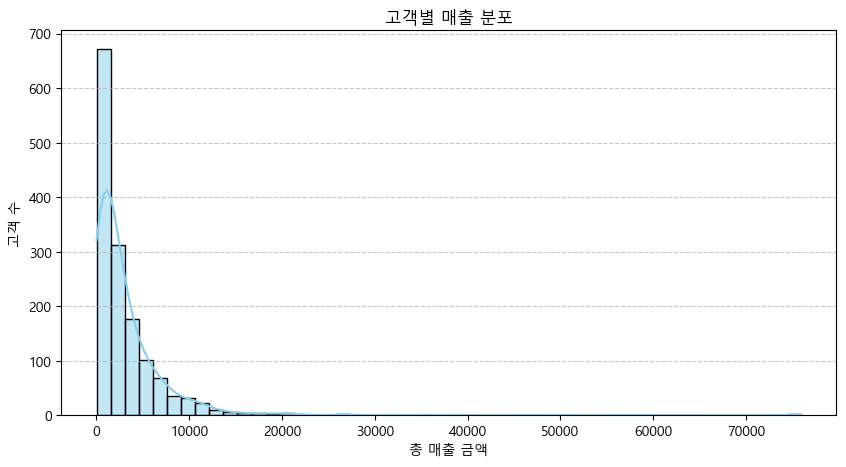

In [ ]:
# 거래 날짜를 datetime 형식으로 변환
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

# 고객별 총 매출 계산
customer_total_revenue = df.groupby('고객ID')['총지출'].sum()

# 고객별 매출 분포도 시각화 (히스토그램 + KDE)
plt.figure(figsize=(10, 5))
sns.histplot(customer_total_revenue, bins=50, kde=True, color='skyblue')
plt.title("고객별 매출 분포")
plt.xlabel("총 매출 금액")
plt.ylabel("고객 수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()